In [1]:
#!/usr/bin/env python 3
#task 1.5: plotting the data without the outliers
__author__ = "Akhilesh Vyas"
__email__ = "vyas.akhilesh009@hotmail.com"

import numpy as np
import scipy.misc as msc
import scipy.ndimage as img
import matplotlib.pyplot as plt
import math

/Users/vyas/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


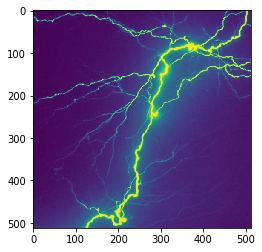

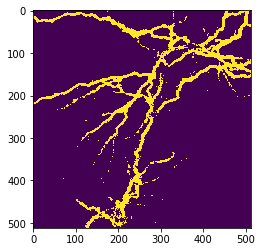

In [2]:
def foreground2BinImg(f):
    d = img.filters.gaussian_filter(f, sigma=0.50, mode='reflect') - img.filters.gaussian_filter(f, sigma=1.00, mode='reflect')
    d = np.abs(d)
    m = d.max()
    d[d< 0.1*m] = 0
    d[d>=0.1*m] = 1
    return img.morphology.binary_closing(d)

imgName = 'lightning-3'
f = msc.imread(imgName+'.png', flatten=True).astype(np.float)
g = foreground2BinImg(f)

plt.imshow(f)
plt.show()

plt.imshow(g)
plt.show()


In [11]:
#scaling Factor

#GetMatrix
def getMatrix(i,j,m,n):
    X = g[i:j,m:n]
    return X

H, W = g.shape
#print (h,w)

L = int(np.log2(W))
N_Boxes = []

for l in range(1, L-1):
    n_boxes = 0
    f = int(math.pow(2, l))
    d = int(H/f)
    for s in range(f):
        i = s*d
        j = (s+1)*d
        for s in range(f):
            m = s*d
            n = (s+1)*d
            #print (i, j, m, n)
            X = getMatrix(i, j, m, n)
            if True in X[:,:]:
                   n_boxes = n_boxes + 1 
    N_Boxes.append(n_boxes)
        
        
N_Boxes_Log= np.log2(np.asarray(N_Boxes))
scale_log = np.asarray([i for i in range(1, L-2)])
print (list(zip(scale_log, N_Boxes_Log)))
    

[(1, 2.0), (2, 3.8073549220576042), (3, 5.4918530963296748), (4, 7.1996723448363644), (5, 8.6582114827517955), (6, 10.055282435501189)]
